In [1]:
import numpy as np
import pandas as pd

# gene embeddings except TERC
gene_embeddings_324 = np.load('../GIT_embedding/gene_emb_pretrain_324.npy')

In [2]:
import json

f = open('../GIT_embedding/new_idx2sga.txt')

new_idx2sga = json.load(f)
new_sga2idx = {new_idx2sga[i]:i for i in new_idx2sga.keys()}

In [3]:
lapatinib_data_new = pd.read_csv('new_lapatinib_data2.csv')
lapatinib_data_new

,DepMap_ID,ABL1,ACVR1B,AKT1,AKT2,AKT3,ALK,ALOX12B,FAM123B,APC,...,WHSC1,WHSC1L1,WT1,XPO1,XRCC2,ZNF217,ZNF703,TERC,AUC,binary_AUC
0,ACH-000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.984736,True
1,ACH-000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.987108,True
2,ACH-000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.991218,True
3,ACH-000006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.971035,True
4,ACH-000007,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.982274,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,ACH-001702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.985085,True
646,ACH-001703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.970532,True
647,ACH-001711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.985580,True
648,ACH-001715,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.977712,True


In [4]:
lapatinib_data_new.binary_AUC.value_counts()

True     612
False     38
Name: binary_AUC, dtype: int64

In [5]:
# lapatinib_data_new = pd.read_csv('new_lapatinib_data3.csv')
# lapatinib_data_new

In [6]:
f = open("../../data sets/train_celllines_v1_1111.txt", "r")
train_barcode = list(map(lambda x: x[:-1], f.readlines()))

f = open("../../data sets/test_celllines_v1_1111.txt", "r")
test_barcode = list(map(lambda x: x[:-1], f.readlines()))

In [7]:
train_index = lapatinib_data_new.loc[lapatinib_data_new.DepMap_ID.isin(train_barcode)].index.values
test_index = lapatinib_data_new.loc[lapatinib_data_new.DepMap_ID.isin(test_barcode)].index.values

In [8]:
sga_embeddings = []
for i in range(len(lapatinib_data_new)):
    mutation = []
    for j in lapatinib_data_new.columns[1:-2]:
        if lapatinib_data_new.loc[i, j] == 1:
            mutation.append(int(new_sga2idx[j])+1)
    sga_embeddings.append(np.array(np.sum(gene_embeddings_324[mutation], axis = 0)))
sga_embeddings = np.array(sga_embeddings)
sga_embeddings.shape

(650, 512)

In [9]:
sga_emb_df = pd.DataFrame(sga_embeddings)
sga_emb_df['AUC'] = lapatinib_data_new['binary_AUC']
sga_emb_df

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,AUC
0,-0.927028,0.639116,1.866425,4.055918,3.751107,-1.023245,-1.786853,-1.410153,-6.253175,-2.048299,...,2.014010,2.639992,-0.613733,1.675156,0.396473,-0.416954,-1.491572,-1.413965,-2.162136,True
1,-0.239989,-1.129692,-2.643764,0.562419,1.838783,0.136650,1.202465,-0.255539,-0.153810,0.823451,...,0.909137,2.186539,-0.288788,-2.635818,0.312842,0.704765,2.593354,-0.789361,-0.214132,True
2,-1.968757,1.282008,-1.093000,1.557762,1.387182,0.192183,-2.185280,-1.837406,-1.723865,0.868373,...,-2.228621,-0.267062,3.218633,-0.299763,3.958994,-1.241243,-1.258956,-1.280184,-1.605217,True
3,4.286502,2.420031,0.614643,0.905071,0.790439,-1.627777,-0.593515,0.035198,-2.278992,1.616082,...,-3.503397,2.171919,-1.840615,1.303661,4.379076,-0.827594,-0.423646,-1.595081,1.349284,True
4,-1.716975,0.064143,-0.068348,5.831461,6.869903,-5.562630,-1.464715,-2.550241,4.702890,-0.174051,...,-4.464917,-0.525841,3.580846,-1.485788,0.273347,-0.487680,-0.004737,2.726622,1.895946,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,-0.988287,0.112383,1.043325,-0.286807,1.065590,-0.641494,-2.486795,2.014941,1.965316,-2.268512,...,-0.073527,-1.482979,-0.068992,0.902026,0.267697,-0.161327,0.492284,-2.626367,-0.831685,True
646,-3.768412,-0.194766,3.726618,5.608398,-2.352318,-5.122783,-1.610689,6.383715,6.682424,0.531254,...,-1.192140,3.526980,2.782003,1.983771,-2.578628,3.351840,2.610061,-3.690277,1.893223,True
647,-1.254050,0.606918,0.669918,-0.574023,2.207669,1.392137,-1.218269,-1.655536,-4.117865,0.149930,...,0.666572,0.640790,1.203259,-0.532390,-0.217326,1.232799,0.434010,-2.748591,0.775463,True
648,-0.862925,-0.824889,-0.394796,-3.386115,2.975010,0.424699,-0.242553,0.996238,-1.265290,1.431265,...,-0.722374,-1.295103,-0.568095,1.159044,3.114779,-1.765045,-2.279855,4.173985,2.812546,True


In [10]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

### using raw sparse SGA
X = sga_emb_df.loc[:, sga_emb_df.columns != 'AUC'].to_numpy()
y = sga_emb_df['AUC'].to_numpy()

# from sklearn.model_selection import train_test_split
X_train = X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

scaler = StandardScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegressionCV(cv=10, penalty = 'l1', class_weight = 'balanced', solver='liblinear', random_state = 321)
lr_model.fit(X_train_scaled, y_train)

LogisticRegressionCV(class_weight='balanced', cv=10, penalty='l1',
                     random_state=321, solver='liblinear')

0.4672131147540984


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


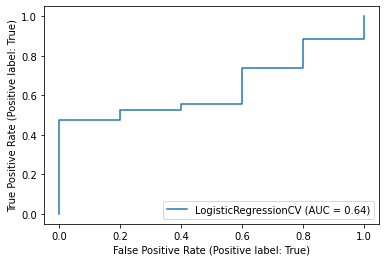

In [11]:
y_pred = lr_model.predict(X_test_scaled)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print(auc)

metrics.plot_roc_curve(lr_model, X_test_scaled, y_test)

In [12]:
confusion_matrix(y_test, y_pred)

array([[ 0,  5],
       [ 4, 57]], dtype=int64)

0.4672131147540984


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


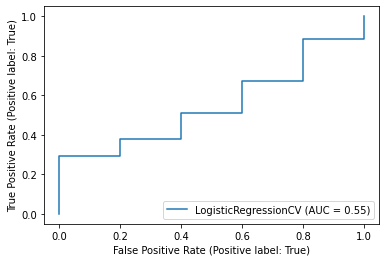

In [13]:
### using tanh embeddings
X = sga_emb_df.loc[:, sga_emb_df.columns != 'AUC'].to_numpy()
y = sga_emb_df['AUC'].to_numpy()

X_train = X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

X_train_scaled = np.tanh(X_train)
X_test_scaled = np.tanh(X_test)

lr_model = LogisticRegressionCV(cv=10, penalty = 'l1', class_weight = 'balanced', solver='liblinear', random_state = 321)
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print(auc)

metrics.plot_roc_curve(lr_model, X_test_scaled, y_test)

In [14]:
confusion_matrix(y_test, y_pred)

array([[ 0,  5],
       [ 4, 57]], dtype=int64)

0.48360655737704916


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


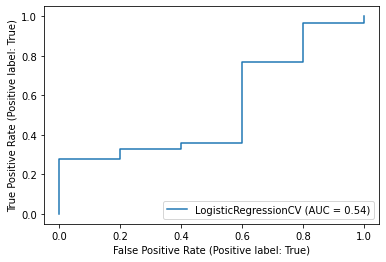

In [15]:
### using mutation data
X = lapatinib_data_new.loc[:, ~lapatinib_data_new.columns.isin(["DepMap_ID", "AUC", "binary_AUC"])].to_numpy()
y = lapatinib_data_new['binary_AUC'].to_numpy()

X_train = X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

lr_model = LogisticRegressionCV(cv=10, penalty = 'l1', class_weight = 'balanced', solver='liblinear', random_state = 321)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print(auc)

metrics.plot_roc_curve(lr_model, X_test, y_test)

In [16]:
confusion_matrix(y_test, y_pred)

array([[ 0,  5],
       [ 2, 59]], dtype=int64)

In [17]:
### finetuned gene embeddings except TERC
gene_embeddings_finetune_324 = np.load('../GIT_embedding/gene_emb_finetune_324.npy')

In [18]:
sga_embeddings_2 = []
for i in range(len(lapatinib_data_new)):
    mutation = []
    for j in lapatinib_data_new.columns[1:-2]:
        if lapatinib_data_new.loc[i, j] == 1:
            mutation.append(int(new_sga2idx[j])+1)
    sga_embeddings_2.append(np.array(np.sum(gene_embeddings_finetune_324[mutation], axis = 0)))
sga_embeddings_2 = np.array(sga_embeddings_2)
sga_embeddings_2.shape

(650, 512)

In [19]:
sga_emb_df_2 = pd.DataFrame(sga_embeddings_2)
sga_emb_df_2['AUC'] = lapatinib_data_new['binary_AUC']
sga_emb_df_2

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,AUC
0,-0.388294,-0.482528,0.225153,-0.119305,-2.266848,0.081942,-0.054795,0.645650,-0.034991,-0.174919,...,0.104429,0.045831,-1.521545,0.224950,2.785315,-0.228912,-0.108266,-0.796452,0.183296,True
1,-0.582458,-0.014535,0.510402,-1.739007,-0.982060,1.085266,1.244397,0.734182,0.255472,-1.201442,...,1.167441,1.037929,-1.222146,-1.086830,0.851584,-0.815835,-0.900880,-0.394717,0.860152,True
2,-0.921826,-0.515857,1.130439,-1.241939,-2.387168,1.260675,1.144651,1.657222,1.206474,-1.118983,...,1.889271,1.362893,-1.196108,-1.511920,2.682674,-1.261115,-1.390068,-0.982118,0.731150,True
3,-0.908448,0.665821,0.067688,-0.519507,-0.328176,0.441412,0.378907,0.614070,-0.491647,-0.900773,...,0.516989,0.192526,-1.444130,-0.954271,1.177836,-0.309686,0.229466,-0.594496,0.177493,True
4,3.386499,-1.365642,-1.516823,1.353233,0.655027,-2.275448,-2.367431,-1.725241,-2.505285,1.565534,...,-0.812216,-0.935470,0.295565,1.651895,0.025370,0.810991,-0.055104,0.659722,0.419629,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,-0.052600,-0.032226,-0.191535,0.524890,-0.038303,-0.585788,-0.330895,0.033459,-0.751115,-0.116542,...,-0.284563,-0.659412,0.980866,0.195268,0.245493,0.929963,0.330220,0.787499,0.144564,True
646,2.687044,3.274370,-0.225037,2.302263,2.726341,-3.337696,-3.018844,-2.143315,-3.854524,2.912734,...,-1.504694,-1.179130,2.647952,-1.667180,-0.326673,2.875322,1.096104,3.107816,0.508833,True
647,-1.533743,-0.458599,1.664889,-2.608367,-3.556130,2.153624,2.222543,2.840013,2.398945,-1.557593,...,2.140441,1.717081,-2.258164,-2.071969,3.555841,-2.529484,-1.976426,-1.164114,1.383966,True
648,1.295796,0.418289,-1.850575,1.345082,-0.599701,-0.225190,-0.410395,-0.245320,0.398189,-0.344103,...,-0.108567,0.462067,0.810895,-0.569271,0.102565,1.831112,0.682395,0.671217,-0.615985,True


0.45081967213114754


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


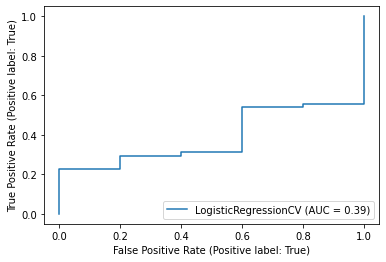

In [20]:
### using raw sparse SGA
X = sga_emb_df_2.loc[:, sga_emb_df_2.columns != 'AUC'].to_numpy()
y = sga_emb_df_2['AUC']

X_train = X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

scaler = StandardScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegressionCV(cv=10, penalty = 'l1', class_weight = 'balanced', solver='liblinear', random_state = 123)
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print(auc)

metrics.plot_roc_curve(lr_model, X_test_scaled, y_test)

In [21]:
confusion_matrix(y_test, y_pred)

array([[ 0,  5],
       [ 6, 55]], dtype=int64)

0.4426229508196721


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


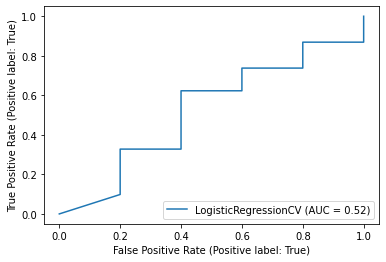

In [22]:
### using tanh embeddings
X = sga_emb_df_2.loc[:, sga_emb_df_2.columns != 'AUC'].to_numpy()
y = sga_emb_df_2['AUC']

X_train = X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

X_train_scaled = np.tanh(X_train)
X_test_scaled = np.tanh(X_test)

lr_model = LogisticRegressionCV(cv=10, penalty = 'l1', class_weight = 'balanced', solver='liblinear', random_state = 123)
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print(auc)

metrics.plot_roc_curve(lr_model, X_test_scaled, y_test)

In [23]:
confusion_matrix(y_test, y_pred)

array([[ 0,  5],
       [ 7, 54]], dtype=int64)